<a href="https://colab.research.google.com/github/lorenafc/MGI/blob/main/AuthorSmallCitiesGeoref.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# #installing libraries

#libraries for encodings
# !pip install descartes -q

# # Install unidecode to fix encoding issue
!pip install unidecode -q
# !pip install openpyxl -q

#libraries for geocoding
# !apt update -q
# !apt upgrade -q
# !apt install gdal-bin python-gdal python3-gdal -q
# !apt install python3 -rtree -q
# !pip install geopandas==0.10.0 -q
# !pip install geopandas geopy -q



In [6]:
#import libraries
import pandas as pd
import geopandas as gpd
import requests  # To make API requests
import folium
from folium import Marker

# for encoding
from unidecode import unidecode

# for geocoding
from geopandas.tools import geocode



In [7]:
# upload the file from your computer
from google.colab import files
uploaded=files.upload()

Saving additional_authors.xlsx to additional_authors.xlsx


In [8]:
# Assuming the uploaded file is named 'additional_authors.xlsx'
file_name = 'additional_authors.xlsx'

# Read the Excel file
authors_small_cities = pd.read_excel(file_name, engine='openpyxl')


In [32]:
authors_small_cities_copy = authors_small_cities.copy()

In [33]:
print(type(authors_small_cities))
print(type(authors_small_cities_copy))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


# 1 - FIXING LOCATION NAMES

In [34]:
## Function to fix encoding issues #source chatgpt


## attempt with many encodings:
import pandas as pd

def fix_encoding(text):
    if not isinstance(text, str):
        return text

    # Define possible encodings
    encodings = ['utf-8', 'latin1', 'windows-1252', 'windows-1250', "latin2", "iso-8859-1", "iso-8859-2",'iso-8859-15', 'macroman', 'ascii', 'cp1250', 'cp1251',
        'cp1253', 'cp1254', 'cp1257', 'iso-8859-2', 'iso-8859-3', 'iso-8859-4',
        'iso-8859-5', 'iso-8859-6', 'iso-8859-7',
        'iso-8859-8', 'iso-8859-9', 'koi8-r', 'koi8-u']


    # Try decoding and encoding combinations
    for enc1 in encodings:
        for enc2 in encodings:
            if enc1 != enc2:
                try:
                    # Try decoding and then encoding with different encodings
                    decoded_text = text.encode(enc2, errors='replace').decode(enc1, errors='replace')
                    # Check if decoded_text makes sense
                    if decoded_text.encode(enc1, errors='replace').decode(enc2, errors='replace') == text:
                        return decoded_text
                except (UnicodeEncodeError, UnicodeDecodeError):
                    continue

    # Try double encoding scenarios
    for enc1 in encodings:
        for enc2 in encodings:
            if enc1 != enc2:
                try:
                    first_pass = text.encode(enc1, errors='replace').decode(enc2, errors='replace')
                    decoded_text = first_pass.encode(enc2, errors='replace').decode(enc1, errors='replace')
                    if decoded_text.encode(enc1, errors='replace').decode(enc2, errors='replace') == text:
                        return decoded_text
                except (UnicodeEncodeError, UnicodeDecodeError):
                    continue

    return text



# Apply the encoding fix function to the columns containing city names
authors_small_cities_copy['bornlocation'] = authors_small_cities_copy['born'].apply(fix_encoding)
authors_small_cities_copy['deathlocation'] = authors_small_cities_copy['death'].apply(fix_encoding)
authors_small_cities_copy['activelocation'] = authors_small_cities_copy['active'].apply(fix_encoding)


# Display the first few rows to verify the changes
print(authors_small_cities_copy[["born",'bornlocation', "death", 'deathlocation']].head())



        born bornlocation        death deathlocation
0                                  NaN           NaN
1                              Cieszin       Cieszin
2      (Chur        (Chur          NaN           NaN
3   A Capela     A Capela          NaN           NaN
4  A GudiÃ±a     A Gudiña  Puebla City   Puebla City


In [ ]:
#HTML ENCODING INCLUDED

# import pandas as pd
# import html  # Import the html module for decoding HTML entities

# def fix_encoding(text):
#     if not isinstance(text, str):
#         return text

#     # Decode HTML entities first
#     text = html.unescape(text)

#     # Define possible encodings
#     encodings = ['utf-8', 'latin1', 'windows-1252', 'windows-1250', "latin2", "iso-8859-1", "iso-8859-2",'iso-8859-15', 'macroman', 'ascii', 'cp1250', 'cp1251',
#         'cp1253', 'cp1254', 'cp1257', 'iso-8859-2', 'iso-8859-3', 'iso-8859-4',
#         'iso-8859-5', 'iso-8859-6', 'iso-8859-7',
#         'iso-8859-8', 'iso-8859-9', 'koi8-r', 'koi8-u']

#     # Try decoding and encoding combinations
#     for enc1 in encodings:
#         for enc2 in encodings:
#             if enc1 != enc2:
#                 try:
#                     # Try decoding and then encoding with different encodings
#                     decoded_text = text.encode(enc2, errors='replace').decode(enc1, errors='replace')
#                     # Check if decoded_text makes sense
#                     if decoded_text.encode(enc1, errors='replace').decode(enc2, errors='replace') == text:
#                         return decoded_text
#                 except (UnicodeEncodeError, UnicodeDecodeError):
#                     continue

#     # Try double encoding scenarios
#     for enc1 in encodings:
#         for enc2 in encodings:
#             if enc1 != enc2:
#                 try:
#                     first_pass = text.encode(enc1, errors='replace').decode(enc2, errors='replace')
#                     decoded_text = first_pass.encode(enc2, errors='replace').decode(enc1, errors='replace')
#                     if decoded_text.encode(enc1, errors='replace').decode(enc2, errors='replace') == text:
#                         return decoded_text
#                 except (UnicodeEncodeError, UnicodeDecodeError):
#                     continue

#     return text

# # Example usage
# # Assuming authors_small_cities_copy is your DataFrame and 'born', 'death' columns contain problematic text
# authors_small_cities_copy['bornlocation'] = authors_small_cities_copy['born'].apply(fix_encoding)
# authors_small_cities_copy['deathlocation'] = authors_small_cities_copy['death'].apply(fix_encoding)
# authors_small_cities_copy['activelocation'] = authors_small_cities_copy['active'].apply(fix_encoding)

# # Display the first few rows to verify the changes
# print(authors_small_cities_copy[['born', 'bornlocation', 'death', 'deathlocation']].head())


In [12]:
print(type(authors_small_cities_copy))

<class 'pandas.core.frame.DataFrame'>


In [35]:
#renaming the columns of the copy
authors_small_cities_rename = authors_small_cities_copy.rename(columns = {'cleanedbirth':'birthyear',
                       'cleaneddeath':'deathyear', "finalname":"nameandbirthdeathyear"},
            inplace = True)


In [36]:
print(type(authors_small_cities_rename))


<class 'NoneType'>


In [37]:

authors_small_cities_cleaned = authors_small_cities_copy.drop(columns=["originalbirth","originaldeath"])


In [38]:
print(authors_small_cities_cleaned.shape)
col_names=list(authors_small_cities_cleaned.columns)
print(col_names)

(80802, 11)
['starturl', 'birthyear', 'deathyear', 'nameandbirthdeathyear', 'georeferenceurl', 'death', 'born', 'active', 'bornlocation', 'deathlocation', 'activelocation']


In [17]:

print(type(authors_small_cities_copy))


<class 'pandas.core.frame.DataFrame'>


In [18]:
import numpy as np

In [39]:
#change the columns order:
authors_small_cities_cleaned=authors_small_cities_cleaned[['starturl', 'birthyear', 'deathyear', 'nameandbirthdeathyear', 'georeferenceurl', 'born', 'bornlocation', 'death', 'deathlocation','active', 'activelocation']]


In [20]:
small_cities =authors_small_cities_cleaned.iloc[:100,:]
print(type(small_cities))

<class 'pandas.core.frame.DataFrame'>


In [40]:
print(small_cities.head())


                         starturl birthyear  deathyear  \
0   http://viaf.org/viaf/81048146      1570     1634.0   
1  http://viaf.org/viaf/180581759       NaN     1775.0   
2  http://viaf.org/viaf/100161519       NaN     1570.0   
3  http://viaf.org/viaf/169350346      1699     1770.0   
4   http://viaf.org/viaf/67541728      1502     1600.0   

                         nameandbirthdeathyear  \
0             Carneiro, Tomé Tavares 1570-1634   
1                     Kolíček, Caesarij, -1775   
2                     Hertel, Jakob 15..?-1570   
3  Ferro Caaveyro, Lucas Antonio ca. 1699-1770   
4       Aparicio, Sebastián de 1502-1600 Santo   

                                     georeferenceurl       born bornlocation  \
0                                  viafprocessedfile                           
1                                  viafprocessedfile                           
2     http://catalogue.bnf.fr/ark:/12148/cb15011774s      (Chur        (Chur   
3  www.wikidata.org/wiki/Q3393

In [22]:
# export the result as excel file
# file_name = 'additonal_authors_cleaned_manyencodings_ok.xlsx'
# authors_small_cities_cleaned.to_excel(file_name)

# 2 - GEOCODING

In [47]:
## ATTEMPT 2  GEOCODING ###### not working

#### USE small_cities to test the geocoding function



# Function to geocode the city names source: PyGEO course and chatgpt

from geopy.geocoders import Nominatim
from geopy.exc import GeopyError

# def geocode_city(city_name):
#     try:
#         geo = geocode(small_cities["bornlocation"], provider="nominatim",  timeout=10)
#         return geo.geometry.iloc[0] if not geo.empty else None
#     except Exception as e:
#         return None


# Initialize Nominatim geocoder
geolocator = Nominatim(user_agent="my_Geocoder_application")

# Function to geocode city names
def geocode_city(city_name):
    try:
        location = geolocator.geocode(city_name, timeout=10)
        if location:
            return (location.latitude, location.longitude)
        else:
            print(f"Geocoding failed for: {city_name}")
            return None
    except GeopyError as e:
        print(f"Geocoding error for {city_name}: {e}")
        return None

# #Example DataFrame
# data = {'bornlocation': ['New York', 'Los Angeles', 'Nonexistent City', "A Capela", "A Gudiña", "Šarišské Sokolovce", "Šibenik", "Škvorci u Českého Brodu", "Øvre Eiker"]}
# authors_small_cities_cleaned = pd.DataFrame(data)

# # Apply the geocoding function to the 'bornlocation' column
# authors_small_cities_cleaned['bornlocation_geo'] = authors_small_cities_cleaned['bornlocation'].apply(geocode_city)

# # Display the first few rows to verify the results
# print(authors_small_cities_cleaned.head(10))

# Apply the geocoding function to the 'borncity', 'deathcity', and 'activecity' columns
small_cities['bornlocation_geo'] = small_cities['bornlocation'].apply(geocode_city)

authors_small_cities_cleaned["bornlocation_geo"] = authors_small_cities_cleaned["bornlocation"].apply(geocode_city)


Geocoding error for  : Non-successful status code 400
Geocoding error for  : Non-successful status code 400
Geocoding failed for: Škvorci u Českého Brodu
Geocoding failed for: Ärakleion
Geocoding failed for: Ägypten (Altertum)
Geocoding failed for: Łagów Ũwiebodzin County
Geocoding failed for: ÃÂÃâ¢ÃÂ¼ce
Geocoding failed for: ÃÂÃâ¢czyca
Geocoding failed for: ÃÂubnice ÃÅ¡wiÃâ¢tokrzyskie Voivodeship
Geocoding failed for: Žebrák (Hořovice)
Geocoding failed for: Železné Rudě
Geocoding error for  : Non-successful status code 400
Geocoding error for  : Non-successful status code 400
Geocoding failed for: Škvorci u Českého Brodu
Geocoding failed for: Ärakleion
Geocoding failed for: Ägypten (Altertum)
Geocoding failed for: Łagów Ũwiebodzin County
Geocoding failed for: ÃÂÃâ¢ÃÂ¼ce
Geocoding failed for: ÃÂÃâ¢czyca
Geocoding failed for: ÃÂubnice ÃÅ¡wiÃâ¢tokrzyskie Voivodeship
Geocoding failed for: Žebrák (Hořovice)
Geocoding failed for: Železné Rudě
Geocoding failed f

KeyboardInterrupt: 

In [43]:
# Display the first few rows to verify the results
print(small_cities[["bornlocation_geo", "bornlocation"]].head(50))

                            bornlocation_geo                   bornlocation
0                                       None                               
1                                       None                               
2                     (46.854747, 9.5264904)                          (Chur
3   (43.442067699999996, -8.043400479082187)                       A Capela
4                   (42.0605483, -7.1403516)                       A Gudiña
5                   (49.1066091, 21.1658029)             Šarišské Sokolovce
6                   (43.7343845, 15.8941361)                        Šibenik
7                   (43.7343845, 15.8941361)                        Šibenik
8                   (43.7343845, 15.8941361)                        Šibenik
9                    (45.126371, 19.2291509)                     Šid Serbia
10                  (48.5815912, 20.2753468)                       Šivetice
11                   (46.165274, 14.3067474)                    Škofja Loka
12          

In [ ]:
print(authors_small_cities_cleaned[["bornlocation", "bornlocation_geo"]]).head(50)

In [ ]:
#export the result as excel file
file_name = 'additional_authors_geocoded.xlsx'
authors_small_cities_cleaned.to_excel(file_name)

#VISUALIZATION

<Axes: >

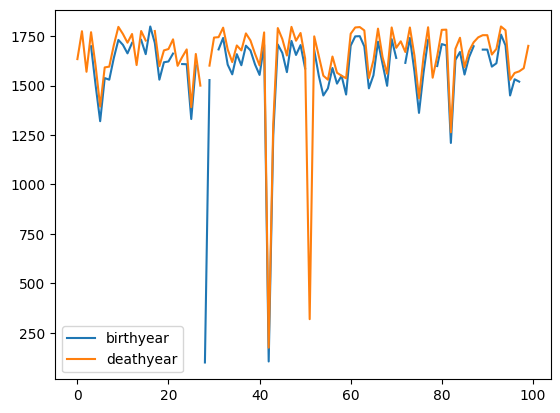

In [46]:
small_cities.plot()